### CRISP - DM Method
- Barry - Business Understanding
- Drove - Data Understanding
- Directly to the - Data Prep
- Medical - Modelling
- Emergency  - Evaluation
- Department - mDeployment 

# 1.  Business Understanding
- Forecasting transactions
- Likely regression
- Data for 3 years
- Advised data quality is okay

# 2. Data Understanding

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('regression.csv')

In [3]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [4]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [6]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [7]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [8]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

## Visualize Data

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

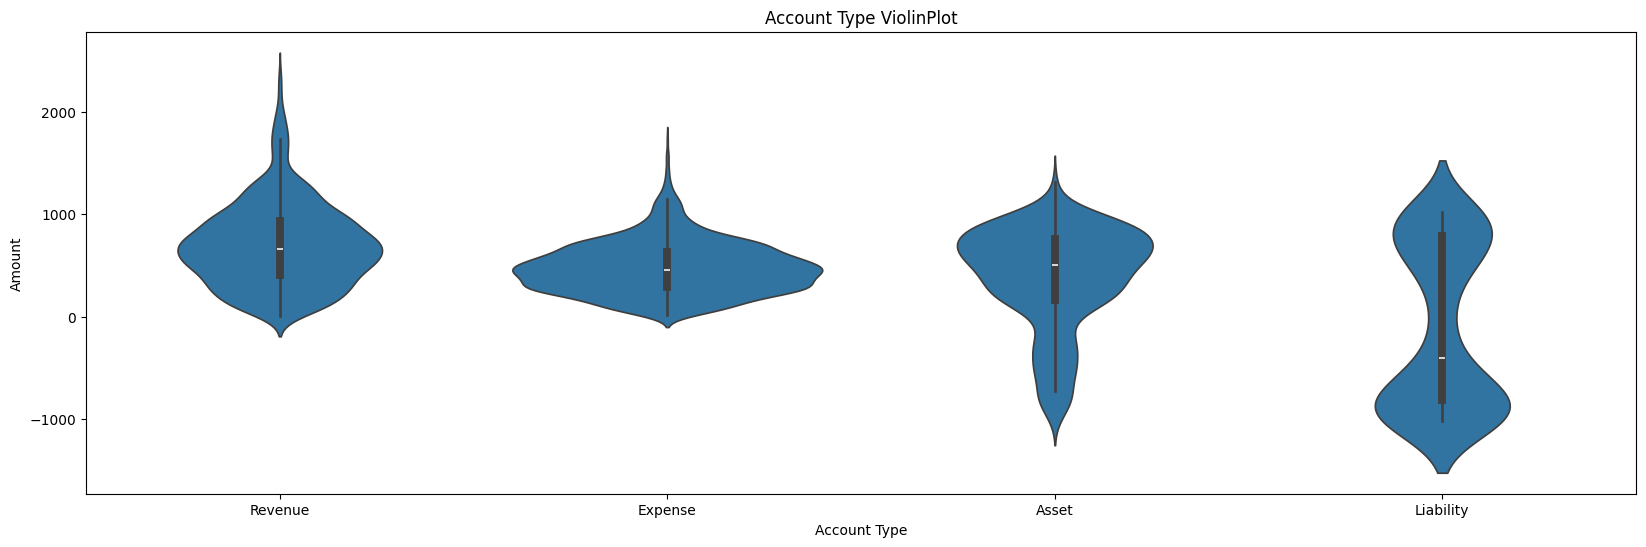

In [10]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Type', y='Amount', data=df).set_title('Account Type ViolinPlot')
plt.show()

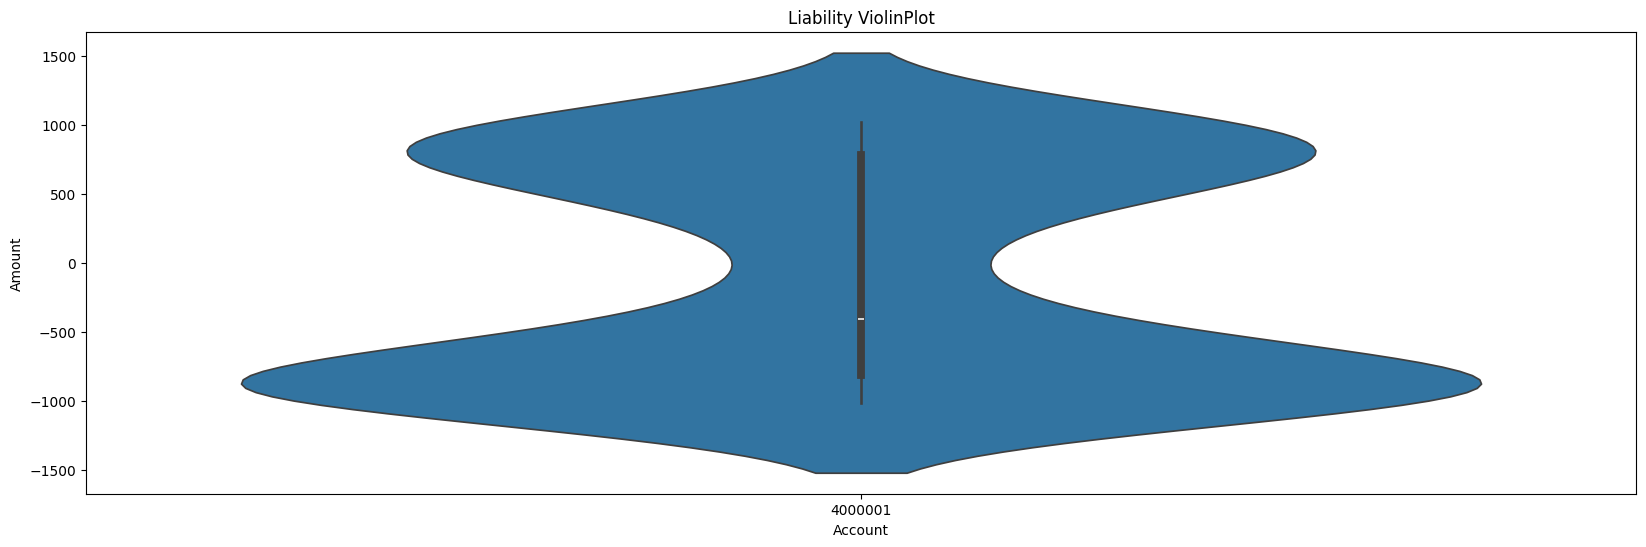

In [11]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account', y='Amount', data=df[df['Account Type']=='Liability']).set_title('Liability ViolinPlot')
plt.show()

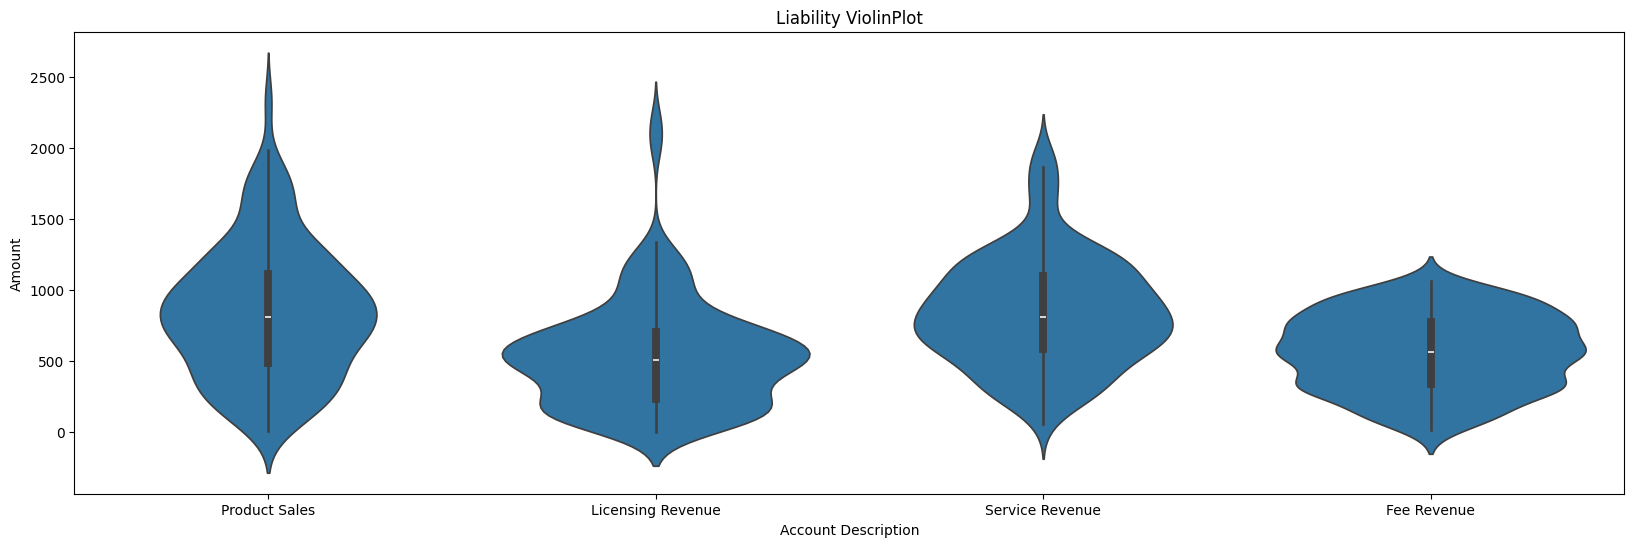

In [12]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Description', y='Amount', data=df[df['Account Type']=='Revenue']).set_title('Liability ViolinPlot')
plt.show()

## Review Trends

In [13]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [14]:
monthmap = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12,
}

In [15]:
monthmap['Jan']

1

In [16]:
df['Period'] = df['Month'].apply(lambda x: monthmap[x])

In [17]:
df['Day'] = 1

In [18]:
df['Date'] = df['Year'].astype(str) + '-' + df['Period'].astype(str) + '-' + df['Day'].astype(str)

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

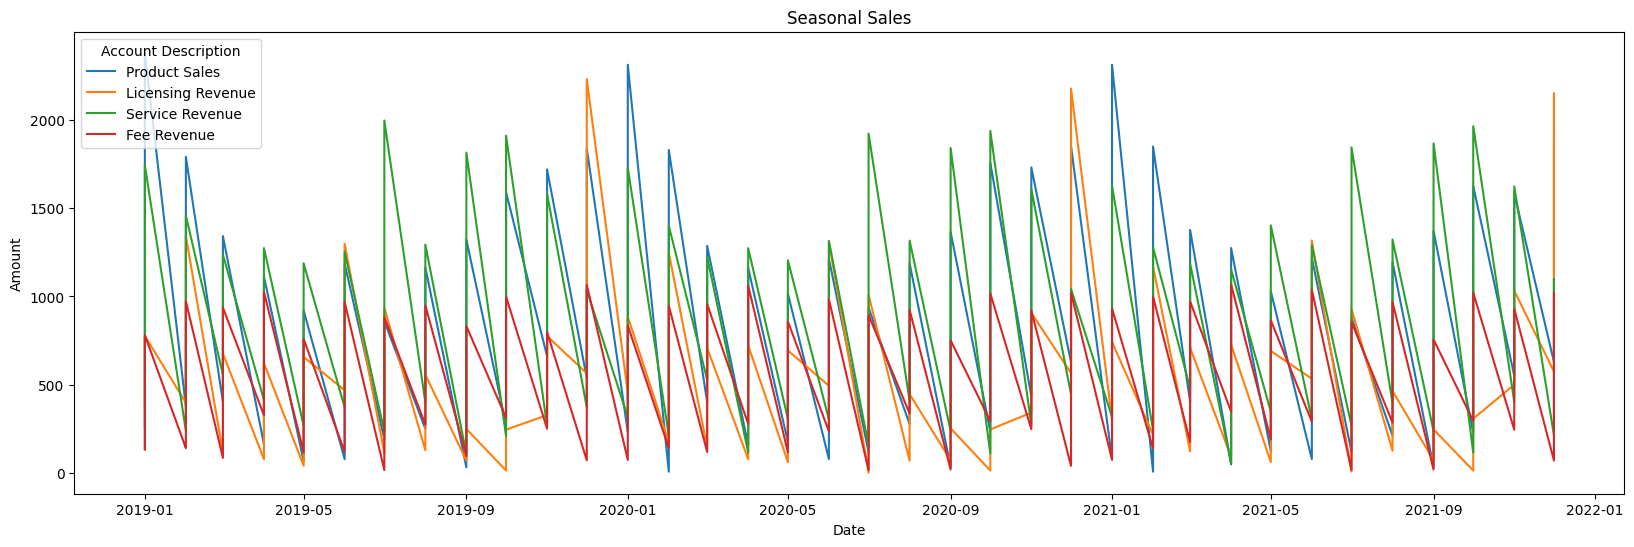

In [21]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Type']=='Revenue']).set_title('Seasonal Sales')
plt.show()

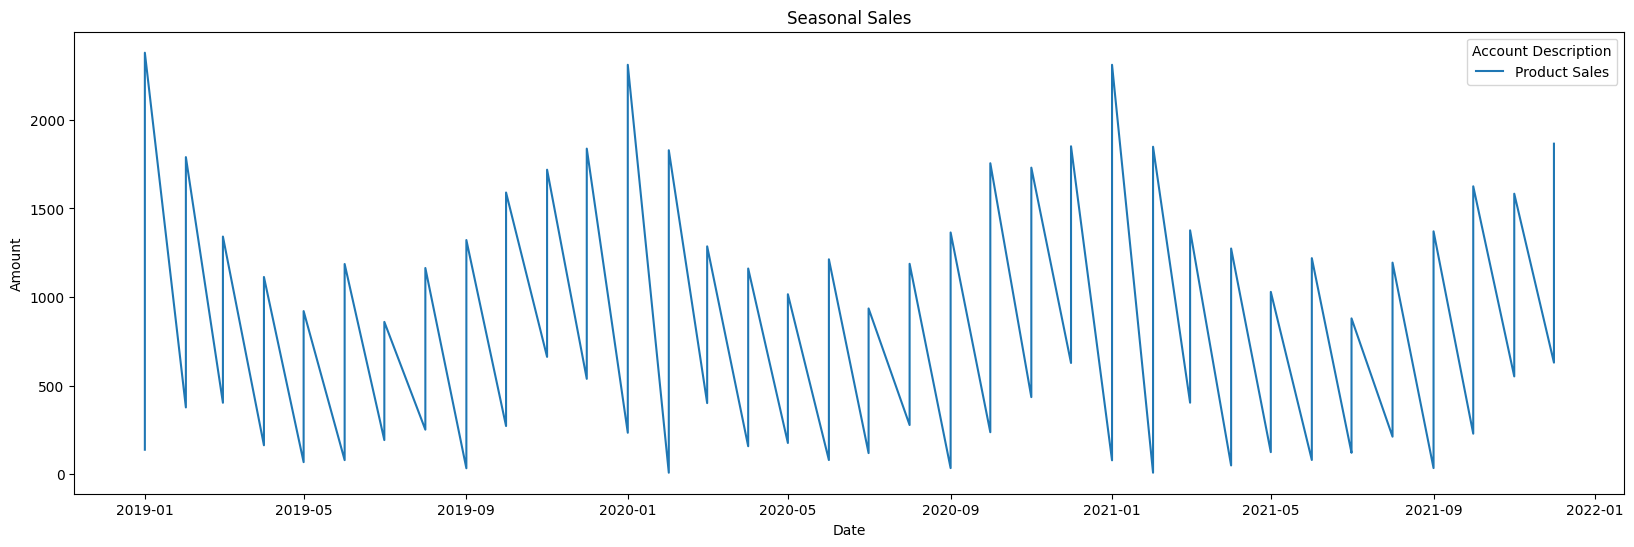

In [22]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Product Sales']).set_title('Seasonal Sales')
plt.show()

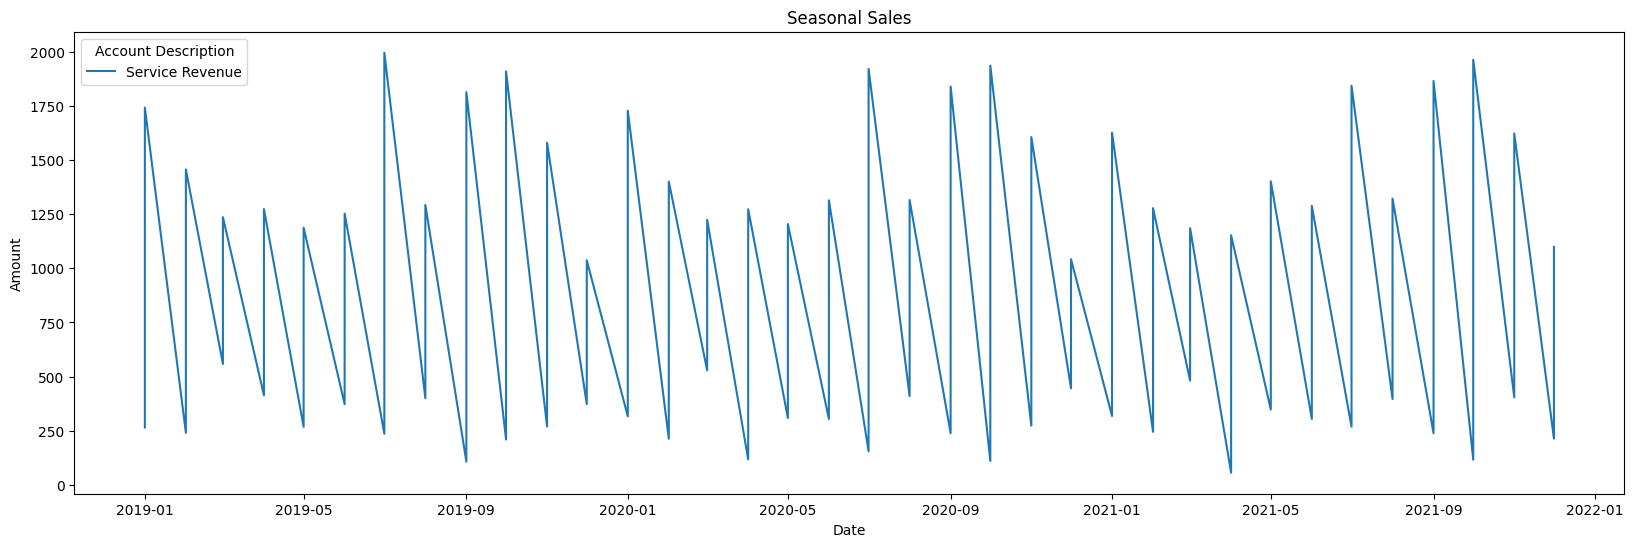

In [23]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Service Revenue']).set_title('Seasonal Sales')
plt.show()

## Correlation

In [24]:
df.corr()

ValueError: could not convert string to float: 'Jan'

In [ ]:
df['Account Description'].unique()

In [ ]:
pd.get_dummies(df['Account'])

In [ ]:
corrdict = {}
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
    corrdict[key] = {int(row['Account']):row['Amount']}

In [ ]:
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0) 

In [ ]:
corrdf.corr()

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(corrdf.corr()).set_title('Account Correlation')
plt.show()

In [ ]:
df[df['Account']==3000000]

In [ ]:
df[df['Account']==4000001]

# 3. Data Preparation

In [ ]:
import numpy as np

In [ ]:
for account in df['Account'].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x='Date', y='Amount', estimator=np.median, hue='Account Description', data=df[df['Account']==account]).set_title('{} by Month'.format(account))
    plt.show()

In [ ]:
#df = df[df['Account']!=3000001]

In [ ]:
df['Account'].unique()

## Convert Fields to Correct Data Type

In [ ]:
df.dtypes

In [ ]:
df['Account'] = 'ACC' + df['Account'].astype(str)

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df['Year'] = df['Year'].astype(str)

In [ ]:
df.dtypes

### Drop Analysis Fields

In [ ]:
df.drop(['Period', 'Day', 'Date'], axis=1, inplace=True)

In [ ]:
df.dtypes

In [ ]:
len(df['Account'].unique())

In [ ]:
len(df['Account Description'].unique())

In [ ]:
df['AccountVal'] = df['Account'] + df['Account Description']

In [ ]:
df.head()

In [ ]:
len(df['AccountVal'].unique())

In [ ]:
df.drop(['Account Description', 'AccountVal'], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
pd.get_dummies(df)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

In [ ]:
df.dtypes

# 4. Modelling

In [ ]:
X = df.drop('Amount', axis=1)
y = df['Amount']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

### Import Dependencies

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),
}

In [ ]:
RandomForestRegressor().get_params()

In [ ]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [ ]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

In [ ]:
fit_models['ridge'].predict(X_test)

# 5. Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

In [ ]:
best_model = fit_models['rf']

# 6. Deployment

In [ ]:
creds = {
  "YOUR CREDS HERE"
}

# 6. Deployment

In [ ]:
!pip install watson_machine_learning_client

In [ ]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [ ]:
wml_client = WatsonMachineLearningAPIClient(creds)

In [ ]:
# Specify Model Constants
MODEL_NAME = 'Transaction Forecast'
DEPLOYMENT_NAME = 'Transaction Forecast - Deployment'
BEST_MODEL = best_model

In [ ]:
# Model Schema
model_props = {
    wml_client.repository.ModelMetaNames.NAME: "{}".format(MODEL_NAME)
}

In [ ]:
published_model_details = wml_client.repository.store_model(model=BEST_MODEL, meta_props=model_props, training_data=X_train, training_target=y_train, pipeline=pipelines['rf'])

In [ ]:
model_uid = wml_client.repository.get_model_uid(published_model_details)

In [ ]:
model_uid

In [ ]:
deployment = wml_client.deployments.create(artifact_uid=model_uid, name=DEPLOYMENT_NAME, asynchronous=False)

### Deployment Review

In [ ]:
# Get deployment stuff
iam_token = wml_client.wml_token
ml_instance_id = creds['instance_id']
url = deployment['entity']['scoring_url']

In [ ]:
deployment

In [ ]:
X_test.columns.to_numpy().tolist()

In [ ]:
X_test.iloc[0].to_numpy().tolist()

In [ ]:
import urllib3, requests, json

In [ ]:
header = {'Content-Type':'application/json', 'Authorization':'Bearer '+iam_token, 'ML-Instance-ID':ml_instance_id}
payload = {'fields':X_test.columns.to_numpy().tolist(), "values":X_test.to_numpy().tolist()}

In [ ]:
payload

In [ ]:
response_scoring = requests.post(url, json=payload, headers=header)

In [ ]:
response_scoring

In [ ]:
response_scoring.text

In [ ]:
predictions = json.loads(response_scoring.text)

In [ ]:
import numpy as np

In [ ]:
pred_values = np.squeeze(predictions['values'])

In [ ]:
pred_values

In [ ]:
preddf = X_test.join(y_test)

In [ ]:
preddf['Scores'] = pred_values

In [ ]:
preddf.head()

In [ ]:
preddf['Diff'] = preddf['Amount'] - preddf['Scores']

In [ ]:
preddf.head()

In [ ]:
preddf.to_csv('results.csv')

In [ ]:
X_test[['Account Type_Asset',  'Account Type_Expense',  'Account Type_Liability',  'Account Type_Revenue']][X_test['Account_ACC3000000']==1].head()

In [ ]:
X_test.iloc[0].to_numpy().tolist()
